In [3]:
import os.path
import sys
sys.path.insert(0,'../../')
from src.analysis.model_performances import *
from helpers import *

In [4]:
answer_type = TRUE_FALSE_ANSWER_TYPE
answer_type_plus = tf_answer_type(score_key = F1_SCORE_KEY)
stats_all = collect_stats_all(answer_type_plus)

100%|██████████| 25920/25920 [00:01<00:00, 14062.77it/s]


# By Complexity

In [5]:
with open('complexity_by_domain.json') as f:
    complexity_by_domain = json.load(f)

In [6]:
model_name = 'gemini'#'Llama-2-7b-chat-hf'#'gemma-2b-it' #
prompt_type = 'few_shot_1'
plan_length = 1
ramifications = WITHOUT_RAMIFICATIONS
subs = WITHOUT_RANDOM_SUB
question_category = ALL_QUESTION_CATEGORIES_KEY

save_dir = os.path.join(STATISTICS_PATH, 'by_domain_plots')
os.makedirs(save_dir, exist_ok=True)

In [7]:
by_domain_result = {}
for domain in DOMAIN_NAMES:
    by_domain_result[domain] = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs)

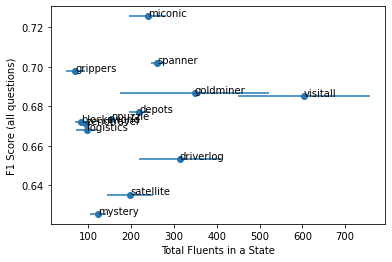

In [8]:
x = [complexity_by_domain[k]['mean'] for k in DOMAIN_NAMES]
x_err = [complexity_by_domain[k]['std'] for k in DOMAIN_NAMES]
y = [by_domain_result[k] for k in DOMAIN_NAMES]

plt.scatter(x, y, s=0.01)
plt.errorbar(x, y, xerr=x_err, fmt='o')
for i, txt in enumerate(DOMAIN_NAMES):
    if x[i] and y[i]:
        # plt.annotate(txt, (x[i]*1.005, y[i]*1.005))
        plt.annotate(txt, (x[i], y[i]))   

# plt.ylim([0.64,0.75])
plt.xlabel('Total Fluents in a State')
plt.ylabel('F1 Score (all questions)')
save_name = f'complexity_vs_f1.{model_name}.{prompt_type}.{subs}.{ramifications}.{question_category}.pl-{plan_length}'
plt.savefig(os.path.join(save_dir, f'{save_name}.pdf'))

# By Ramifications

by ram, gemini, few shot 1, without random sub, pl-1


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

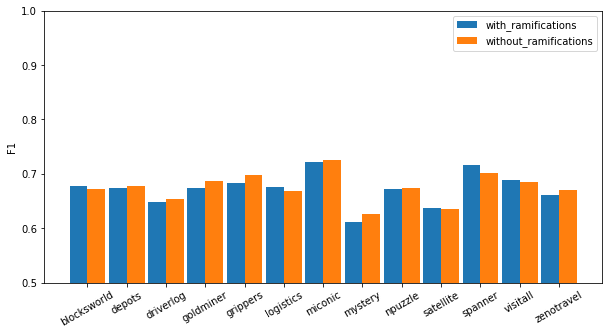

In [9]:
categories = DOMAIN_NAMES

data_all = []
for ramifications in RAMIFICATION_TYPES:
    plt.figure()
    data = {NAME_KEY: ramifications, DATA_KEY: []}
    for domain in categories:
        res = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs) 
        data[DATA_KEY].append(res)
    data_all.append(data)

plt_n_bars(categories, data_all)
plt.ylabel('F1')
plt.ylim([0.5,1])
save_name =  f'by_ram.{model_name}.{prompt_type}.{subs}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')

print(save_name.replace('.',', ').replace('_',' '))

# By prompt_type

by prompt type, gemini, without ramifications, without random sub, pl-1


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

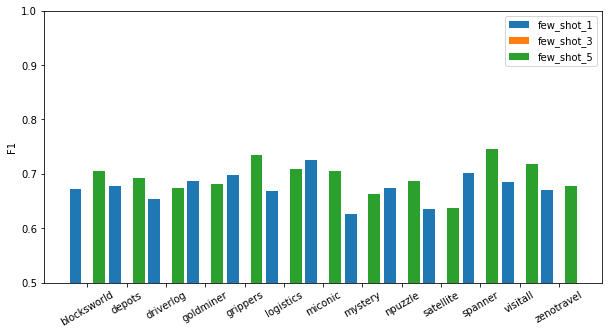

In [10]:
categories = DOMAIN_NAMES
ramifications = WITHOUT_RAMIFICATIONS

data_all = []
for prompt_type in PROMPT_TYPES:
    plt.figure()
    data = {NAME_KEY: prompt_type, DATA_KEY: []}
    for domain in categories:
        res = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs) 
        data[DATA_KEY].append(res)
    data_all.append(data)

plt_n_bars(categories, data_all)
plt.ylabel('F1')
plt.ylim([0.5,1])
save_name =  f'by_prompt_type.{model_name}.{ramifications}.{subs}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')

print(save_name.replace('.',', ').replace('_',' '))

# By Random Subs

by random subs, gemini, with ramifications, few shot 1, pl-1


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

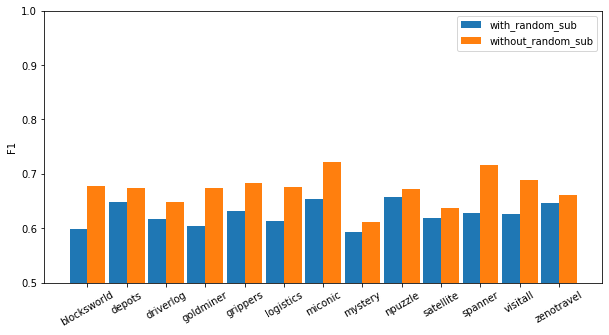

In [11]:
categories = DOMAIN_NAMES
ramifications = WITH_RAMIFICATIONS
prompt_type = 'few_shot_1'

data_all = []
for subs in SUBSTITUTION_TYPES:
    plt.figure()
    data = {NAME_KEY: subs, DATA_KEY: []}
    for domain in categories:
        res = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs) 
        data[DATA_KEY].append(res)
    data_all.append(data)

plt_n_bars(categories, data_all)
plt.ylabel('F1')
plt.ylim([0.5,1])
save_name =  f'by_random_subs.{model_name}.{ramifications}.{prompt_type}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')

print(save_name.replace('.',', ').replace('_',' '))

# By Model Names


by random subs, gemini, with ramifications, few shot 1, pl-1


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

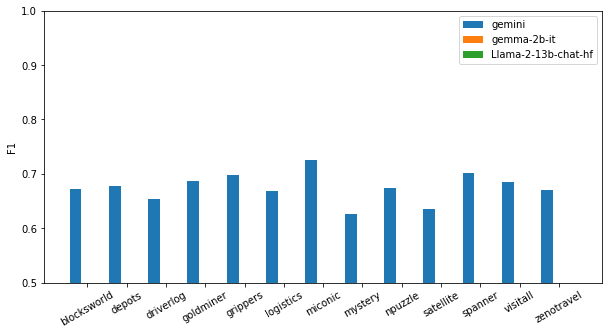

In [14]:
categories = DOMAIN_NAMES
ramifications = WITHOUT_RAMIFICATIONS
prompt_type = 'few_shot_1'
subs = WITHOUT_RANDOM_SUB

data_all = []
for model_name in PROMPT_MODEL_NAMES:
    plt.figure()
    data = {NAME_KEY: model_name, DATA_KEY: []}
    for domain in categories:
        res = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs) 
        data[DATA_KEY].append(res)
    data_all.append(data)

plt_n_bars(categories, data_all)
plt.ylabel('F1')
plt.ylim([0.5,1])
# save_name =  f'by_random_subs.{model_name}.{ramifications}.{prompt_type}.pl-{plan_length}'
# save_path = os.path.join(save_dir, f'{save_name}.pdf')
# plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')

print(save_name.replace('.',', ').replace('_',' '))